## 1. 수집

In [ ]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 28.2 MB/s eta 0:00:00


In [ ]:
!pip install beautifulsoup4

In [ ]:
!pip install dask

In [ ]:
import os
import time
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import dask
from dask import delayed, compute

In [ ]:
fish_list = ["고등어", "감성돔", "방어", "농어", "황어", "가숭어", "대구", "숭어"]

In [ ]:
def setup_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")
    options.add_argument("--disable-gpu")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    return webdriver.Chrome(options=options)

In [ ]:
def download_images(query, num_images):
    driver = setup_driver()
    query_safe = query.replace(" ", "_")  # 띄어쓰기를 '_'로 변경
    save_dir = f"./dataset/{query_safe}"
    os.makedirs(save_dir, exist_ok=True)

    driver.get(f"https://www.google.com/search?q={query}&tbm=isch")
    print(f"Searching images for: {query}")

    count = 0
    while count < num_images:
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        images = soup.select("#rso > div > div > div.wH6SXe.u32vCb > div > div img")

        for img in images:
            if count >= num_images:
                break
            img_url = img.get('src')
            if img_url and img_url.startswith('http'):
                try:
                    img_data = requests.get(img_url).content
                    file_name = os.path.join(save_dir, f"{query_safe}_{count}.jpg")
                    with open(file_name, 'wb') as f:
                        f.write(img_data)
                    print(f"Saved: {file_name}")
                    count += 1
                except Exception as e:
                    print(f"Failed to download {img_url}: {e}")

        print("Scrolling to load more images...")
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(1)

    driver.quit()
    print(f"Finished downloading {count} images for query: {query}")


In [ ]:
def parallel_image_crawl(num_images, object_list):
    tasks = [delayed(download_images)(obj, num_images) for obj in object_list]
    compute(*tasks)

In [ ]:
parallel_image_crawl(3000, fish_list)

Searching images for: 고등어
Searching images for: 가숭어
Searching images for: 감성돔
Searching images for: 황어
Searching images for: 숭어
Searching images for: 농어
Searching images for: 방어
Searching images for: 대구
Scrolling to load more images...
Scrolling to load more images...
Scrolling to load more images...
Scrolling to load more images...
Scrolling to load more images...Scrolling to load more images...
Scrolling to load more images...

Scrolling to load more images...
Saved: ./dataset/숭어\숭어_0.jpgSaved: ./dataset/고등어\고등어_0.jpg
Saved: ./dataset/방어\방어_0.jpg

Saved: ./dataset/대구\대구_0.jpg
Saved: ./dataset/감성돔\감성돔_0.jpg
Saved: ./dataset/농어\농어_0.jpg
Saved: ./dataset/가숭어\가숭어_0.jpg
Saved: ./dataset/황어\황어_0.jpg
Saved: ./dataset/방어\방어_1.jpg
Saved: ./dataset/농어\농어_1.jpg
Saved: ./dataset/가숭어\가숭어_1.jpg
Saved: ./dataset/황어\황어_1.jpg
Saved: ./dataset/대구\대구_1.jpg
Saved: ./dataset/고등어\고등어_1.jpg
Saved: ./dataset/감성돔\감성돔_1.jpg
Saved: ./dataset/숭어\숭어_1.jpg
Saved: ./dataset/농어\농어_2.jpg
Saved: ./dataset/방어\방어_2.jpg

### 클래스별 데이터 분포 확인

In [5]:
!pip install matplotlib

In [ ]:
import os
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='Malgun Gothic')  # Windows 환경
# rc('font', family='Nanum Gothic')  # Linux 환경 (예: Ubuntu)

def visualize_class_distribution(base_dir):
    class_counts = {}
    for class_name in os.listdir(base_dir):
        class_dir = os.path.join(base_dir, class_name)
        if os.path.isdir(class_dir):
            class_counts[class_name] = len(os.listdir(class_dir))

    plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel("클래스")
    plt.ylabel("이미지 개수")
    plt.title("클래스 분포")
    plt.xticks(rotation=45)
    plt.show()

visualize_class_distribution("./dataset")


In [ ]:
from PIL import Image

def remove_invalid_images(base_dir):
    invalid_images = []
    for class_name in os.listdir(base_dir):
        class_dir = os.path.join(base_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            try:
                with Image.open(img_path) as img:
                    img.verify()
                    if img.size[0] < 100 or img.size[1] < 100:
                        invalid_images.append(img_path)
            except Exception as e:
                invalid_images.append(img_path)

    for img_path in invalid_images:
        print(f"Removing invalid image: {img_path}")
        os.remove(img_path)

remove_invalid_images("./dataset")

Removing invalid image: ./dataset/opened_icebox/opened_icebox_18.jpg
Removing invalid image: ./dataset/opened_icebox/opened_icebox_42.jpg
Removing invalid image: ./dataset/opened_icebox/opened_icebox_89.jpg
Removing invalid image: ./dataset/opened_icebox/opened_icebox_95.jpg
Removing invalid image: ./dataset/opened_icebox/opened_icebox_99.jpg
Removing invalid image: ./dataset/opened_icebox/opened_icebox_69.jpg
Removing invalid image: ./dataset/opened_icebox/opened_icebox_87.jpg
Removing invalid image: ./dataset/opened_icebox/opened_icebox_57.jpg
Removing invalid image: ./dataset/opened_icebox/opened_icebox_36.jpg
Removing invalid image: ./dataset/opened_icebox/opened_icebox_61.jpg
Removing invalid image: ./dataset/opened_icebox/opened_icebox_85.jpg
Removing invalid image: ./dataset/opened_icebox/opened_icebox_79.jpg
Removing invalid image: ./dataset/opened_icebox/opened_icebox_54.jpg
Removing invalid image: ./dataset/opened_icebox/opened_icebox_58.jpg
Removing invalid image: ./dataset/

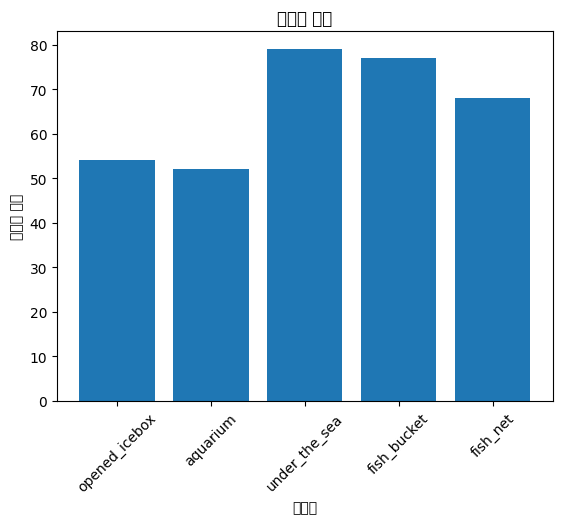

In [ ]:
visualize_class_distribution("./dataset")

In [ ]:
import hashlib

def remove_duplicates(base_dir):
    hashes = set()
    duplicates = []

    for class_name in os.listdir(base_dir):
        class_dir = os.path.join(base_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            with open(img_path, 'rb') as img_file:
                img_hash = hashlib.md5(img_file.read()).hexdigest()
                if img_hash in hashes:
                    duplicates.append(img_path)
                else:
                    hashes.add(img_hash)

    for img_path in duplicates:
        print(f"Removing duplicate image: {img_path}")
        os.remove(img_path)

remove_duplicates("./dataset")

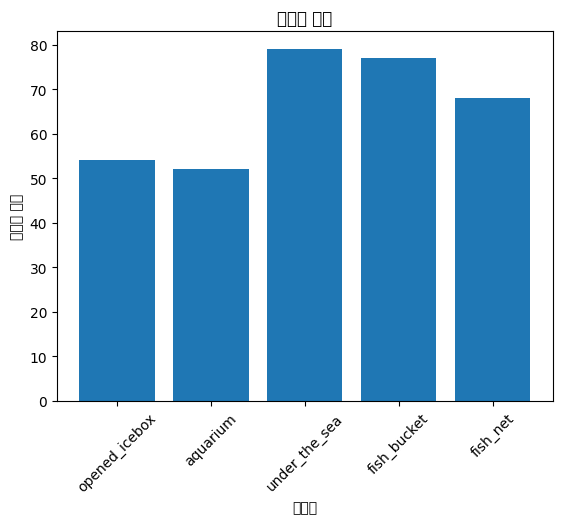

In [ ]:
visualize_class_distribution("./dataset")

### 라벨링 완료한 데이터 가져오기 (API 사용)

In [11]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mJbHkH0w4VdQhDcy7ZbZ")
project = rf.workspace("fishistify").project("fishitify")
version = project.version(4)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fishitify-4 in yolov8:: 100%|██████████| 7783/7783 [00:01<00:00, 7068.31it/s]


## 3. 학습

In [22]:
!pip install ultralytics

In [23]:
import locale
locale.getpreferredencoding = lambda: 'UTF-8'

In [24]:
import ultralytics
print("Ultralytics version:", ultralytics.__version__)

Ultralytics version: 8.3.53


In [25]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [26]:
!cat /content/fishitify/data.yaml

names:
- bang-eo
- daegu
- gamseongdom
- gasung-eo
- godeung-eo
- hwang-eo
- nong-eo
- sung-eo
nc: 8
roboflow:
  license: Private
  project: fishitify
  url: https://app.roboflow.com/fishistify/fishitify/4
  version: 4
  workspace: fishistify
test: ../test/images
train: ../train/images
val: ../valid/images


In [27]:
from ultralytics import YOLO

# 1. 모델 불러오기 (YOLOv8n: nano, YOLOv8s: small 등 선택 가능)
model = YOLO('yolov8n.pt')  # Pre-trained 모델 로드

# 2. 데이터 학습
model.train(
    data='/content/fishitify/data.yaml',  # data.yaml 파일 경로
    epochs=300,                  # 학습 반복 수
    patience=50,
    batch=16,                   # 배치 크기
    imgsz=640,                  # 입력 이미지 크기
    name='yolov8_training',     # 결과 저장 디렉토리 이름
    device=0                    # GPU 장치 번호 (0: 첫 번째 GPU, 'cpu' 사용 시 CPU)
)


Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/fishitify/data.yaml, epochs=300, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_training3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

train: Scanning /content/fishitify/train/labels... 3510 images, 256 backgrounds, 0 corrupt: 100%|██████████| 3510/3510 [00:02<00:00, 1328.60it/s]


train: New cache created: /content/fishitify/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/fishitify/valid/labels... 252 images, 19 backgrounds, 0 corrupt: 100%|██████████| 252/252 [00:00<00:00, 1171.14it/s]

val: New cache created: /content/fishitify/valid/labels.cache


Plotting labels to runs/detect/yolov8_training3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/yolov8_training3
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      2.34G      1.488      3.605       1.84         17        640: 100%|██████████| 220/220 [00:33<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.95it/s]


                   all        252        633     0.0891      0.138     0.0643     0.0233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      2.26G      1.455      3.091      1.793         26        640: 100%|██████████| 220/220 [00:32<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.01it/s]


                   all        252        633     0.0864      0.205     0.0761     0.0365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      2.37G      1.501      2.937      1.833         19        640: 100%|██████████| 220/220 [00:32<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.14it/s]


                   all        252        633      0.105      0.153     0.0592     0.0216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      2.29G      1.536      2.891      1.859         24        640: 100%|██████████| 220/220 [00:32<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        252        633     0.0793      0.122     0.0297     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      2.37G       1.53      2.782      1.855         18        640: 100%|██████████| 220/220 [00:33<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.12it/s]


                   all        252        633      0.164      0.185     0.0959     0.0402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      2.34G      1.484      2.643      1.804         47        640: 100%|██████████| 220/220 [00:32<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.39it/s]


                   all        252        633      0.176      0.219      0.132     0.0595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      2.24G      1.455      2.576      1.803         52        640: 100%|██████████| 220/220 [00:33<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.96it/s]


                   all        252        633      0.136      0.227      0.122     0.0603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      2.38G       1.45      2.453      1.781         37        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.19it/s]


                   all        252        633      0.245      0.274      0.204     0.0968

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      2.25G      1.416      2.385      1.749         42        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.35it/s]

                   all        252        633      0.297      0.276      0.237       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      2.26G      1.408      2.304      1.742         25        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.52it/s]

                   all        252        633      0.334      0.325      0.261       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      2.24G      1.391      2.223       1.71         47        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.17it/s]


                   all        252        633       0.28      0.319      0.251      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      2.34G      1.367      2.208      1.707         30        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.21it/s]


                   all        252        633       0.34       0.35      0.297      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      2.26G      1.353      2.169      1.692         33        640: 100%|██████████| 220/220 [00:32<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.47it/s]


                   all        252        633      0.318      0.357      0.296      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      2.27G      1.358      2.128      1.692         17        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.51it/s]

                   all        252        633      0.438      0.415       0.36      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      2.41G      1.345      2.058      1.671         28        640: 100%|██████████| 220/220 [00:33<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.47it/s]

                   all        252        633      0.339      0.275      0.256      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300       2.3G      1.326      2.043      1.664         22        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.46it/s]

                   all        252        633      0.247      0.369      0.257      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      2.25G      1.314      1.987      1.659         11        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.46it/s]

                   all        252        633      0.442      0.338      0.346      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      2.46G      1.314      1.965       1.65         21        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.45it/s]

                   all        252        633      0.356      0.364      0.308      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      2.28G      1.298      1.904      1.634         22        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.46it/s]

                   all        252        633      0.406      0.414      0.384      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      2.26G      1.279       1.88      1.629         39        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.32it/s]


                   all        252        633       0.37      0.383       0.36      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      2.29G      1.283      1.865      1.627         56        640: 100%|██████████| 220/220 [00:32<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.61it/s]

                   all        252        633      0.436      0.421       0.36      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      2.29G      1.291      1.835      1.617         15        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.56it/s]

                   all        252        633      0.396      0.392      0.325      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      2.27G      1.259       1.78      1.594         41        640: 100%|██████████| 220/220 [00:33<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.41it/s]

                   all        252        633      0.414      0.423      0.382      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      2.26G      1.272      1.769      1.605         28        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.58it/s]

                   all        252        633      0.339      0.401      0.349      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      2.41G      1.266      1.768      1.605         26        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.24it/s]

                   all        252        633       0.41      0.381      0.348      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300       2.2G      1.246      1.712      1.587         21        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.49it/s]


                   all        252        633      0.414      0.447      0.414       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      2.26G      1.232      1.681      1.577         18        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.62it/s]

                   all        252        633       0.43      0.407      0.383      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      2.27G      1.238      1.662      1.572         21        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.40it/s]

                   all        252        633      0.521      0.388      0.405      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      2.24G      1.221       1.66      1.568         32        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.55it/s]

                   all        252        633      0.428      0.411      0.377      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      2.24G       1.23       1.63      1.567         47        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.46it/s]

                   all        252        633      0.532      0.426      0.436      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      2.38G      1.228      1.634      1.569         44        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.58it/s]

                   all        252        633      0.426      0.477      0.412      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      2.24G      1.214      1.589      1.554         31        640: 100%|██████████| 220/220 [00:32<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.63it/s]

                   all        252        633      0.448      0.475      0.427      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      2.24G      1.202      1.568      1.548         23        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.51it/s]


                   all        252        633      0.489      0.429       0.42      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      2.24G      1.193      1.535      1.533         25        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.64it/s]

                   all        252        633      0.488      0.401      0.409      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      2.27G       1.18      1.527      1.523         23        640: 100%|██████████| 220/220 [00:32<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.62it/s]

                   all        252        633      0.514      0.338      0.375      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      2.26G      1.188      1.518      1.536         26        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.55it/s]

                   all        252        633      0.444      0.408      0.364       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      2.26G      1.183      1.488      1.528         26        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.68it/s]

                   all        252        633      0.559      0.376      0.427      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      2.27G      1.176      1.458      1.521         15        640: 100%|██████████| 220/220 [00:32<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.45it/s]

                   all        252        633      0.475      0.454      0.421      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      2.26G      1.172      1.452      1.514         26        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.67it/s]

                   all        252        633      0.585      0.374      0.426      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      2.26G      1.153      1.458      1.513         40        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.64it/s]

                   all        252        633      0.504      0.463      0.458      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      2.32G      1.159      1.432      1.507         45        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.53it/s]

                   all        252        633      0.486       0.48      0.452      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      2.26G      1.143      1.413      1.489         21        640: 100%|██████████| 220/220 [00:32<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.64it/s]

                   all        252        633      0.594      0.393      0.432      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      2.27G      1.141      1.418      1.503         23        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.56it/s]

                   all        252        633      0.483      0.419       0.43       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      2.36G      1.142      1.394      1.492         14        640: 100%|██████████| 220/220 [00:33<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.60it/s]

                   all        252        633      0.492      0.465      0.454      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      2.26G      1.135      1.395      1.494         36        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.63it/s]

                   all        252        633      0.497      0.497      0.449      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      2.26G      1.124      1.389      1.486         17        640: 100%|██████████| 220/220 [00:32<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.50it/s]

                   all        252        633      0.459      0.455       0.42      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      2.26G      1.139      1.348      1.489         29        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.66it/s]

                   all        252        633      0.411      0.507       0.43      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      2.24G      1.117       1.35       1.48         31        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.75it/s]

                   all        252        633      0.447      0.435      0.442      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      2.37G      1.099      1.312      1.461         21        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.69it/s]

                   all        252        633      0.492      0.461      0.437      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300       2.3G      1.117      1.315      1.474         26        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.59it/s]

                   all        252        633       0.43       0.41      0.387      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      2.26G      1.102      1.307      1.461         23        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.60it/s]

                   all        252        633      0.547      0.412      0.427      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      2.36G      1.098      1.281      1.454         30        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.70it/s]

                   all        252        633      0.463      0.445      0.419      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      2.26G      1.091      1.283      1.451         28        640: 100%|██████████| 220/220 [00:32<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.59it/s]

                   all        252        633      0.508      0.379      0.419      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      2.31G      1.096      1.273      1.448         26        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.59it/s]

                   all        252        633      0.421      0.431      0.415      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      2.18G      1.089      1.269      1.459         20        640: 100%|██████████| 220/220 [00:32<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.72it/s]

                   all        252        633      0.558      0.407      0.434      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      2.26G      1.101      1.258      1.449         17        640: 100%|██████████| 220/220 [00:33<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.69it/s]

                   all        252        633      0.526      0.478      0.465      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      2.26G      1.072      1.233      1.431         41        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.66it/s]

                   all        252        633      0.544      0.447      0.461      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      2.36G      1.067      1.232      1.433         31        640: 100%|██████████| 220/220 [00:32<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.68it/s]

                   all        252        633       0.55      0.448       0.45      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      2.28G      1.071      1.231      1.436         25        640: 100%|██████████| 220/220 [00:32<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.54it/s]

                   all        252        633      0.612      0.424      0.471      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      2.26G       1.07      1.211       1.43         23        640: 100%|██████████| 220/220 [00:32<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.73it/s]

                   all        252        633       0.51      0.512      0.473      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      2.29G      1.065      1.219      1.438         36        640: 100%|██████████| 220/220 [00:32<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.81it/s]

                   all        252        633      0.515      0.466      0.467      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      2.27G      1.061      1.196      1.423         32        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.49it/s]

                   all        252        633      0.414      0.464      0.418      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      2.28G      1.051       1.19      1.419         14        640: 100%|██████████| 220/220 [00:32<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.80it/s]

                   all        252        633       0.46      0.503      0.462      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      2.25G      1.058      1.193      1.424         22        640: 100%|██████████| 220/220 [00:32<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.68it/s]

                   all        252        633      0.518      0.468      0.483      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      2.26G      1.043      1.171      1.406         23        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.58it/s]

                   all        252        633      0.522      0.467      0.459       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      2.41G       1.05      1.168      1.417         21        640: 100%|██████████| 220/220 [00:32<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.75it/s]

                   all        252        633      0.504      0.479      0.466      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      2.25G      1.036      1.153      1.409         34        640: 100%|██████████| 220/220 [00:32<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.53it/s]

                   all        252        633      0.577      0.414      0.462      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      2.36G      1.032      1.174      1.408         31        640: 100%|██████████| 220/220 [00:33<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.73it/s]

                   all        252        633       0.46      0.495      0.465      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      2.26G      1.039      1.172      1.412         28        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.69it/s]

                   all        252        633      0.539      0.422      0.437      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300       2.4G      1.039      1.146       1.41         26        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.50it/s]

                   all        252        633      0.499      0.478      0.446      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      2.28G      1.029      1.152      1.406         24        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.76it/s]

                   all        252        633      0.501      0.453      0.448      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      2.28G       1.02      1.114      1.392         28        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.58it/s]

                   all        252        633      0.559      0.444      0.473      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      2.35G      1.013      1.108      1.387         29        640: 100%|██████████| 220/220 [00:33<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.70it/s]

                   all        252        633      0.516      0.488       0.47      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      2.27G      1.005       1.09      1.382         27        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.68it/s]

                   all        252        633      0.543      0.467      0.471       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      2.23G      1.019      1.097      1.386         20        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.43it/s]

                   all        252        633      0.566      0.424       0.47      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      2.26G      1.007      1.094      1.379         15        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.67it/s]

                   all        252        633      0.559      0.439      0.464      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      2.24G      1.009      1.094      1.382         27        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.72it/s]

                   all        252        633       0.48      0.473      0.459      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      2.24G      1.006      1.077      1.382         18        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.30it/s]

                   all        252        633      0.519      0.484       0.48       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      2.27G      1.009      1.076      1.377         43        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.71it/s]

                   all        252        633      0.475      0.465      0.453      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      2.25G      1.001      1.066      1.373         24        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.55it/s]

                   all        252        633      0.501      0.478      0.469       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      2.26G     0.9946      1.053      1.365         35        640: 100%|██████████| 220/220 [00:33<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.67it/s]

                   all        252        633      0.518      0.445      0.447      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      2.26G     0.9985      1.066      1.365         31        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.73it/s]

                   all        252        633       0.45      0.517      0.477      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      2.24G     0.9956      1.066      1.366         31        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.49it/s]

                   all        252        633      0.553      0.439      0.488       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      2.26G     0.9848      1.046      1.362         41        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.70it/s]

                   all        252        633       0.55      0.492      0.497      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      2.28G     0.9974      1.045      1.364         31        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.67it/s]

                   all        252        633      0.567      0.457      0.483      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      2.36G     0.9832       1.04      1.354         18        640: 100%|██████████| 220/220 [00:33<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.62it/s]

                   all        252        633       0.51      0.443      0.467      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      2.24G     0.9762      1.022       1.35         20        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.55it/s]

                   all        252        633      0.573       0.44       0.48      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300       2.3G     0.9737       1.03      1.349         18        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.59it/s]

                   all        252        633      0.524      0.447       0.47      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      2.29G     0.9807      1.035      1.354         20        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.70it/s]

                   all        252        633      0.512      0.456      0.457      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      2.36G     0.9895      1.033      1.366         37        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.69it/s]

                   all        252        633      0.464      0.477      0.448      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      2.27G     0.9651     0.9991      1.344         31        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.51it/s]

                   all        252        633      0.519      0.485      0.475      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      2.37G     0.9621      1.007      1.345         36        640: 100%|██████████| 220/220 [00:33<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.63it/s]

                   all        252        633      0.498      0.465      0.463      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      2.36G     0.9672      1.018      1.351         31        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.59it/s]

                   all        252        633      0.572       0.42      0.449      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      2.29G     0.9606     0.9964      1.341         38        640: 100%|██████████| 220/220 [00:33<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.70it/s]

                   all        252        633      0.472      0.472      0.442      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      2.26G      0.965      1.011      1.346         24        640: 100%|██████████| 220/220 [00:33<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.74it/s]

                   all        252        633      0.528      0.449      0.467      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      2.26G     0.9664          1      1.343         38        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.51it/s]

                   all        252        633      0.529      0.499      0.479      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      2.38G     0.9588     0.9869      1.335         29        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.76it/s]

                   all        252        633       0.48       0.49      0.452      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      2.38G     0.9415     0.9599      1.326         34        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.68it/s]

                   all        252        633       0.54      0.417      0.471      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      2.26G     0.9443     0.9629      1.325         20        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]

                   all        252        633      0.555       0.43      0.466      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      2.36G     0.9446     0.9805      1.329         39        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.70it/s]

                   all        252        633      0.562      0.454      0.483      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      2.35G     0.9367     0.9752      1.325         34        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.60it/s]

                   all        252        633      0.539      0.458       0.48      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      2.29G     0.9455     0.9641      1.324         31        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.74it/s]

                   all        252        633      0.567      0.463      0.489      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      2.39G     0.9359     0.9517      1.317         47        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.63it/s]

                   all        252        633      0.597      0.459      0.482      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      2.26G     0.9411     0.9721      1.328         30        640: 100%|██████████| 220/220 [00:33<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.60it/s]

                   all        252        633      0.532        0.5      0.472      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      2.37G     0.9339     0.9526      1.316         29        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.75it/s]

                   all        252        633      0.547      0.462      0.473      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      2.35G     0.9315     0.9513      1.317         26        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.55it/s]

                   all        252        633      0.513      0.481      0.479      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      2.28G     0.9241     0.9571      1.316         26        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]

                   all        252        633      0.525      0.511      0.495      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      2.26G     0.9204     0.9344      1.309         32        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.69it/s]

                   all        252        633      0.544      0.466      0.472      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      2.37G     0.9332     0.9244      1.312         37        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.49it/s]

                   all        252        633      0.491      0.469      0.465      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      2.27G     0.9162      0.938      1.309         36        640: 100%|██████████| 220/220 [00:32<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.57it/s]

                   all        252        633      0.492      0.474      0.455      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      2.26G     0.9231     0.9325      1.307         20        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.65it/s]

                   all        252        633      0.527      0.434      0.444      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      2.24G     0.9095     0.9254      1.304         33        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.56it/s]

                   all        252        633      0.563      0.445      0.471      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      2.26G     0.9172     0.9119      1.305         25        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.71it/s]

                   all        252        633      0.511      0.468      0.462      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      2.26G     0.9035     0.9081      1.298         40        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.55it/s]

                   all        252        633      0.579      0.433      0.483      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      2.41G     0.9083     0.9061      1.294         22        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.70it/s]

                   all        252        633      0.527      0.445      0.479      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      2.17G     0.9044     0.9161      1.301         20        640: 100%|██████████| 220/220 [00:32<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.75it/s]

                   all        252        633      0.549      0.459      0.478       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      2.34G     0.9137     0.9127      1.303         32        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.63it/s]

                   all        252        633      0.477      0.516      0.482      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      2.31G     0.8936     0.9041      1.292         47        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]

                   all        252        633      0.616      0.437      0.483      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      2.26G     0.8938     0.8867      1.291         37        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.52it/s]

                   all        252        633      0.475      0.486      0.478      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      2.27G     0.9003     0.8947      1.292         20        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.75it/s]

                   all        252        633      0.581      0.472      0.491      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      2.26G     0.9017     0.9008      1.294         33        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.59it/s]

                   all        252        633       0.56      0.477       0.49      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      2.28G     0.8857     0.8862       1.28         40        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.55it/s]

                   all        252        633      0.505      0.478      0.472      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      2.37G     0.8926     0.8839      1.286         33        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.69it/s]

                   all        252        633      0.549      0.461      0.483      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      2.27G     0.8795     0.8732      1.277         34        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.66it/s]

                   all        252        633      0.496      0.473      0.461      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      2.24G      0.888     0.8828      1.284         21        640: 100%|██████████| 220/220 [00:33<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.64it/s]

                   all        252        633      0.552       0.46      0.481      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      2.26G     0.8827     0.8756       1.28         32        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.62it/s]

                   all        252        633      0.477      0.472      0.458      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      2.28G     0.8699     0.8736      1.275         51        640: 100%|██████████| 220/220 [00:32<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.47it/s]

                   all        252        633      0.579      0.438      0.469      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      2.24G     0.8837     0.8933      1.289         19        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.74it/s]

                   all        252        633      0.546      0.447      0.459      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      2.24G     0.8793     0.8824      1.283         31        640: 100%|██████████| 220/220 [00:32<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.67it/s]

                   all        252        633      0.639      0.402      0.477      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      2.24G     0.8754     0.8713      1.275         34        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.57it/s]

                   all        252        633      0.626      0.389      0.467      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      2.26G     0.8759     0.8705      1.276         38        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.58it/s]

                   all        252        633      0.476      0.486      0.462      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      2.29G     0.8742     0.8635      1.276         16        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.69it/s]

                   all        252        633      0.525      0.498      0.487      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      2.39G     0.8804     0.8681      1.277         19        640: 100%|██████████| 220/220 [00:33<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]

                   all        252        633      0.559      0.439      0.472      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      2.24G     0.8809     0.8601      1.279         25        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]

                   all        252        633      0.532      0.462      0.471      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      2.24G     0.8613     0.8483      1.265         31        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.60it/s]

                   all        252        633      0.624      0.425      0.483      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      2.26G     0.8714     0.8681      1.272         37        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.76it/s]

                   all        252        633      0.514      0.477      0.473      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      2.26G     0.8553      0.839      1.263         24        640: 100%|██████████| 220/220 [00:32<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.68it/s]

                   all        252        633      0.532      0.465      0.492      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      2.24G     0.8673     0.8576       1.27         24        640: 100%|██████████| 220/220 [00:33<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.63it/s]

                   all        252        633      0.504       0.49      0.474      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      2.25G     0.8624     0.8478      1.266         30        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]

                   all        252        633      0.554      0.427      0.474      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      2.28G      0.855     0.8391      1.262         55        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.62it/s]

                   all        252        633      0.527      0.468      0.475      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300       2.3G      0.854     0.8478      1.262         20        640: 100%|██████████| 220/220 [00:33<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.63it/s]

                   all        252        633      0.505      0.489      0.481      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      2.37G     0.8573     0.8434      1.259         14        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.80it/s]

                   all        252        633      0.534       0.46      0.473      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      2.26G     0.8542     0.8348      1.257         12        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.52it/s]

                   all        252        633      0.633      0.426      0.489      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      2.29G     0.8445     0.8242      1.252         38        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.68it/s]

                   all        252        633       0.59      0.445      0.494      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      2.26G     0.8492     0.8268      1.256         22        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.75it/s]

                   all        252        633      0.516      0.494      0.496      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      2.24G     0.8489      0.821      1.251         22        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.69it/s]

                   all        252        633      0.469      0.534      0.493      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      2.26G     0.8436     0.8275      1.249         29        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]

                   all        252        633      0.536      0.482      0.496      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      2.36G     0.8318     0.8247      1.246         35        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.73it/s]

                   all        252        633      0.534      0.476      0.489      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      2.24G     0.8507     0.8189      1.254         30        640: 100%|██████████| 220/220 [00:33<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.71it/s]

                   all        252        633      0.536      0.492      0.488      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      2.26G       0.83     0.8058       1.24         34        640: 100%|██████████| 220/220 [00:32<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.74it/s]

                   all        252        633      0.566      0.449      0.489        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      2.24G     0.8302      0.808      1.239         19        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.58it/s]

                   all        252        633      0.588      0.474      0.484      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      2.37G     0.8346     0.8073      1.246         40        640: 100%|██████████| 220/220 [00:33<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.73it/s]

                   all        252        633      0.575      0.474       0.49      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300       2.4G     0.8455     0.8324      1.254         14        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.74it/s]

                   all        252        633      0.516      0.503      0.491      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      2.26G     0.8227     0.7934       1.24         35        640: 100%|██████████| 220/220 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.72it/s]

                   all        252        633      0.589      0.469      0.494      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      2.27G     0.8224     0.7954       1.24         39        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.71it/s]

                   all        252        633      0.558      0.457      0.479      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      2.27G     0.8246     0.7901      1.236         27        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.80it/s]

                   all        252        633      0.466      0.503      0.473      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      2.24G     0.8375     0.8082       1.25         26        640: 100%|██████████| 220/220 [00:33<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.58it/s]

                   all        252        633      0.528      0.456      0.476      0.287


EarlyStopping: Training stopped early as no improvement observed in last 50 epochs. Best results observed at epoch 107, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

157 epochs completed in 1.529 hours.
Optimizer stripped from runs/detect/yolov8_training3/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/yolov8_training3/weights/best.pt, 6.3MB

Validating runs/detect/yolov8_training3/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]


                   all        252        633      0.523      0.509      0.494      0.307
               bang-eo         30         53      0.591      0.566      0.534      0.343
                 daegu         21         31      0.477      0.412      0.365      0.222
           gamseongdom         57        225       0.71      0.578       0.62      0.376
             gasung-eo         31         64      0.437      0.484      0.536      0.303
            godeung-eo         22         75      0.503       0.77      0.609      0.386
              hwang-eo         28         63      0.599      0.476      0.492       0.27
               nong-eo         26         39      0.537      0.641      0.607      0.443
               sung-eo         31         83       0.33      0.148      0.188      0.115
Speed: 0.3ms preprocess, 2.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/yolov8_training3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b39be7e5690>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

사용 가능한 컬럼:
Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


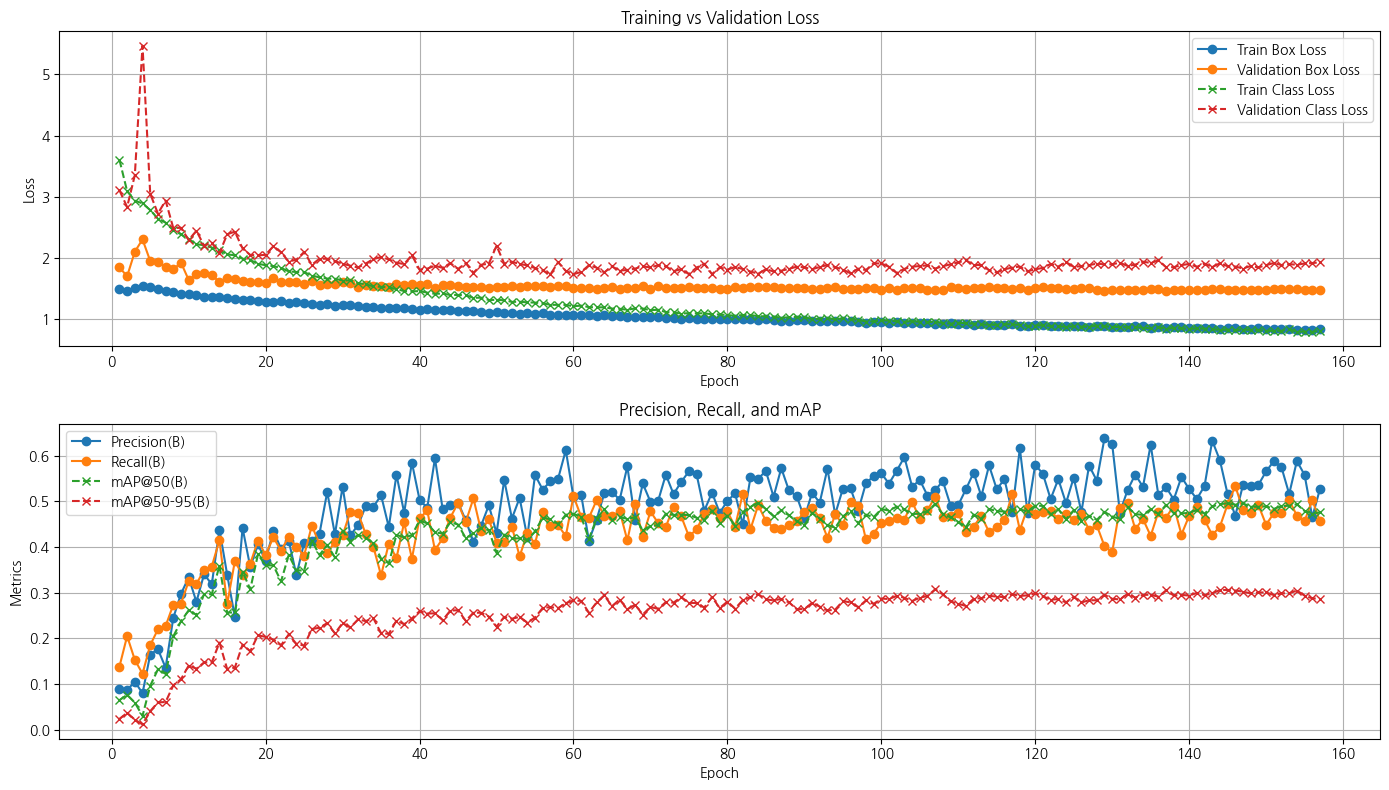

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
results_csv = '/content/runs/detect/yolov8_training3/results.csv'
results_df = pd.read_csv(results_csv)

# 컬럼 출력 및 확인
print("사용 가능한 컬럼:")
print(results_df.columns)

# 그래프 그리기
plt.figure(figsize=(14, 8))

# (1) 손실 그래프: Train Loss vs Validation Loss
plt.subplot(2, 1, 1)
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss', marker='o')
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='Validation Box Loss', marker='o')
plt.plot(results_df['epoch'], results_df['train/cls_loss'], label='Train Class Loss', linestyle='--', marker='x')
plt.plot(results_df['epoch'], results_df['val/cls_loss'], label='Validation Class Loss', linestyle='--', marker='x')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# (2) 정확도 그래프: Precision, Recall, mAP
if 'metrics/mAP50(B)' in results_df.columns:
    plt.subplot(2, 1, 2)
    if 'metrics/precision(B)' in results_df.columns:
        plt.plot(results_df['epoch'], results_df['metrics/precision(B)'], label='Precision(B)', marker='o')
    if 'metrics/recall(B)' in results_df.columns:
        plt.plot(results_df['epoch'], results_df['metrics/recall(B)'], label='Recall(B)', marker='o')
    if 'metrics/mAP50(B)' in results_df.columns:
        plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP@50(B)', linestyle='--', marker='x')
    if 'metrics/mAP50-95(B)' in results_df.columns:
        plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='mAP@50-95(B)', linestyle='--', marker='x')
    plt.title('Precision, Recall, and mAP')
    plt.xlabel('Epoch')
    plt.ylabel('Metrics')
    plt.legend()
    plt.grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()


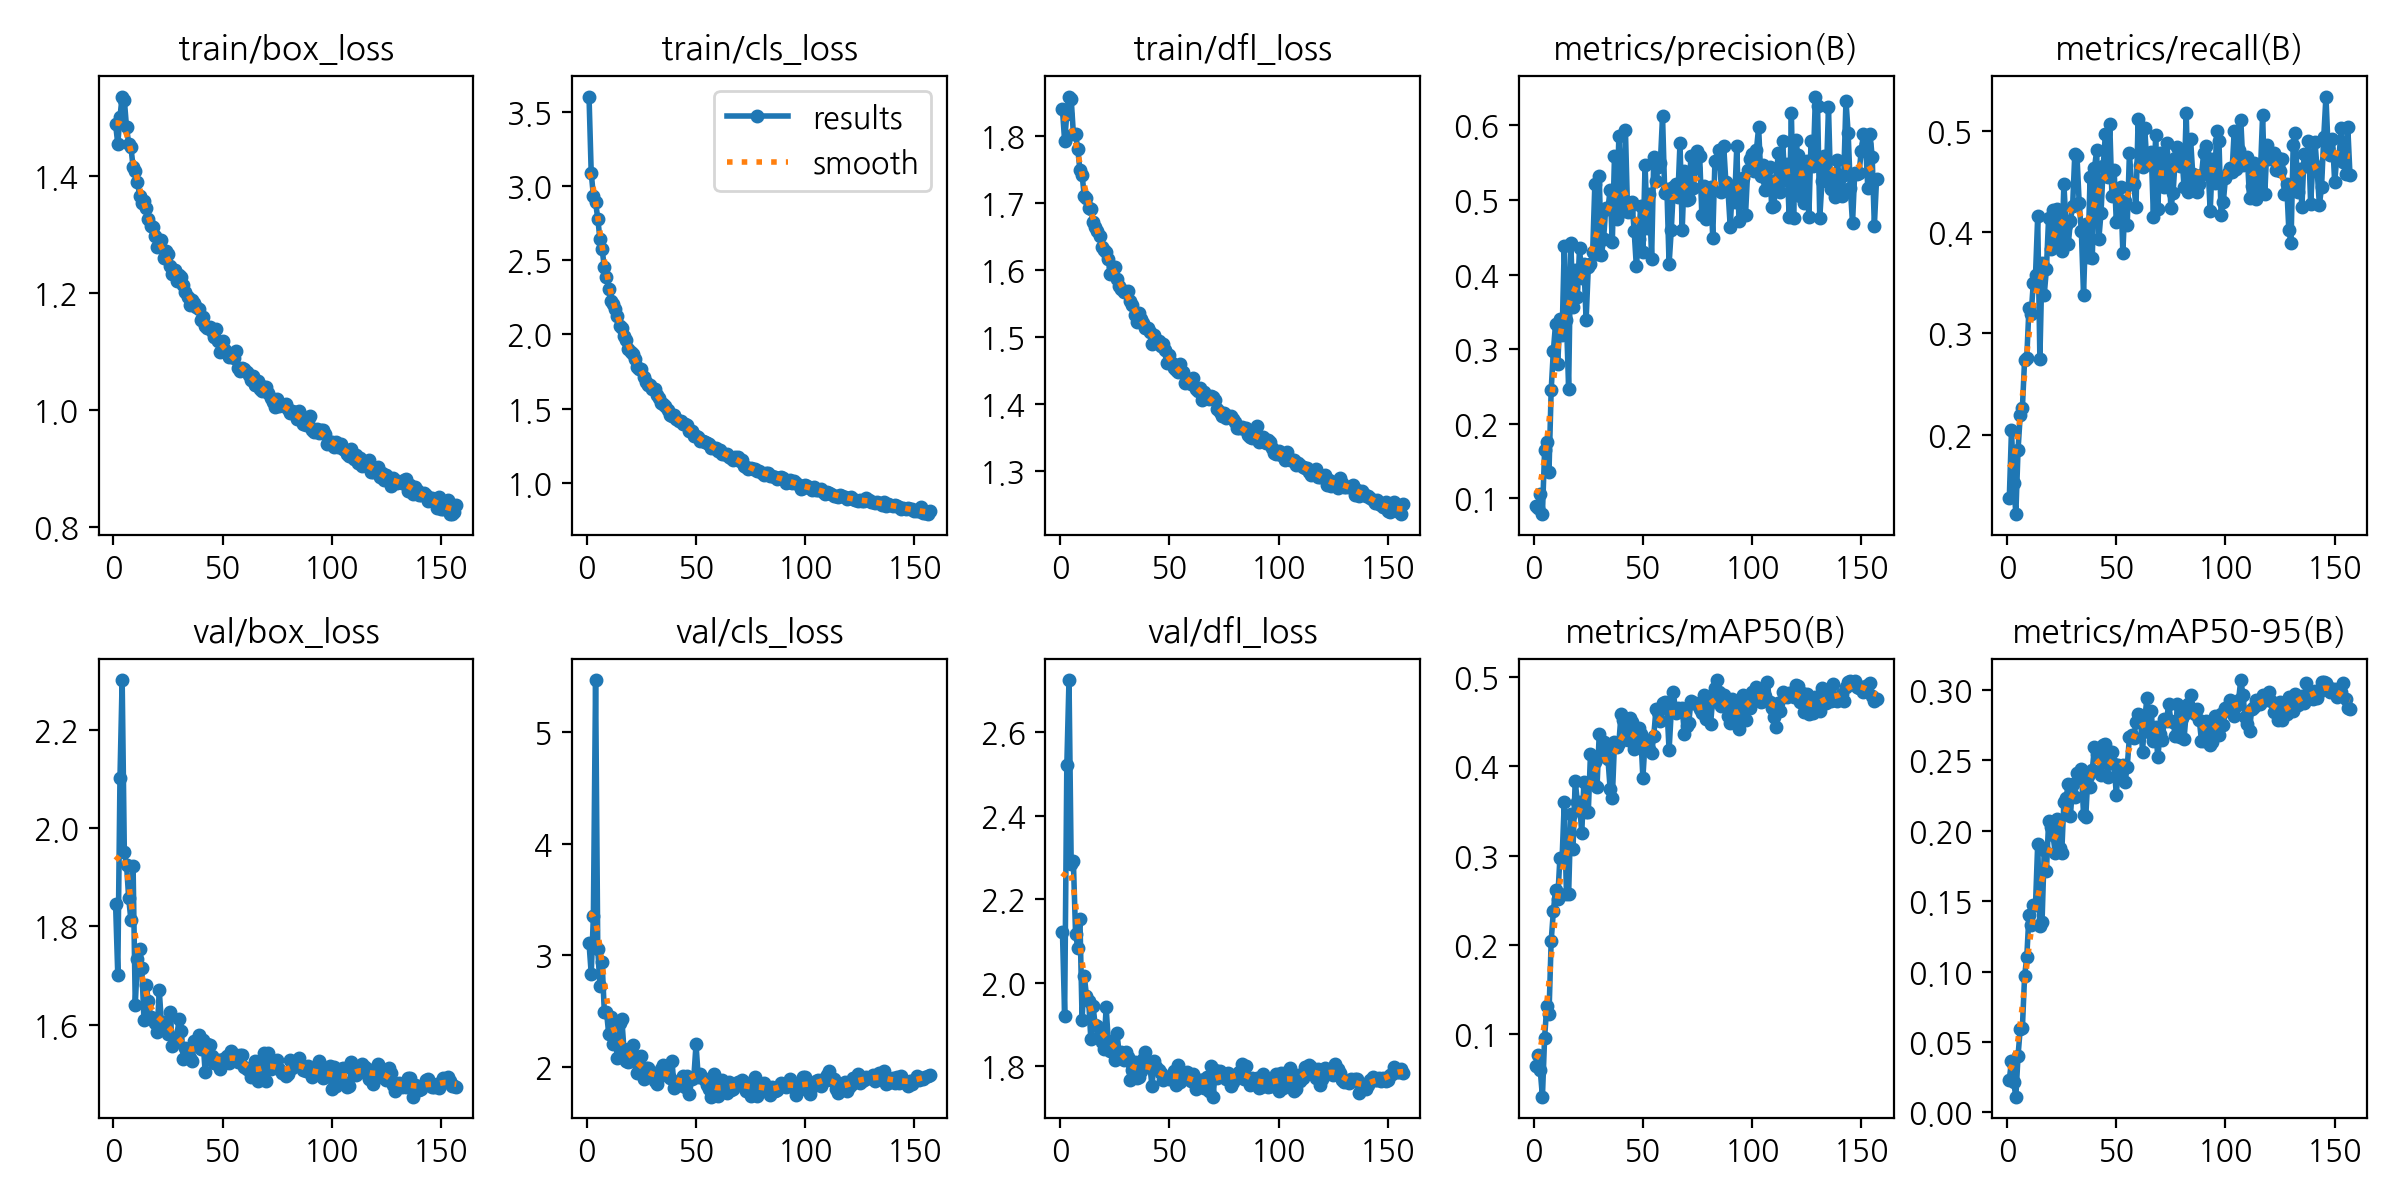

In [30]:
from IPython.display import Image as show_image
show_image(f"/content/runs/detect/yolov8_training3/results.png", width=800)

In [32]:
import pandas as pd

# CSV 파일 경로
results_csv = '/content/runs/detect/yolov8_training3/results.csv'
results_df = pd.read_csv(results_csv)

# CSV 컬럼 확인
print("사용 가능한 컬럼:")
print(results_df.columns)

사용 가능한 컬럼:
Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


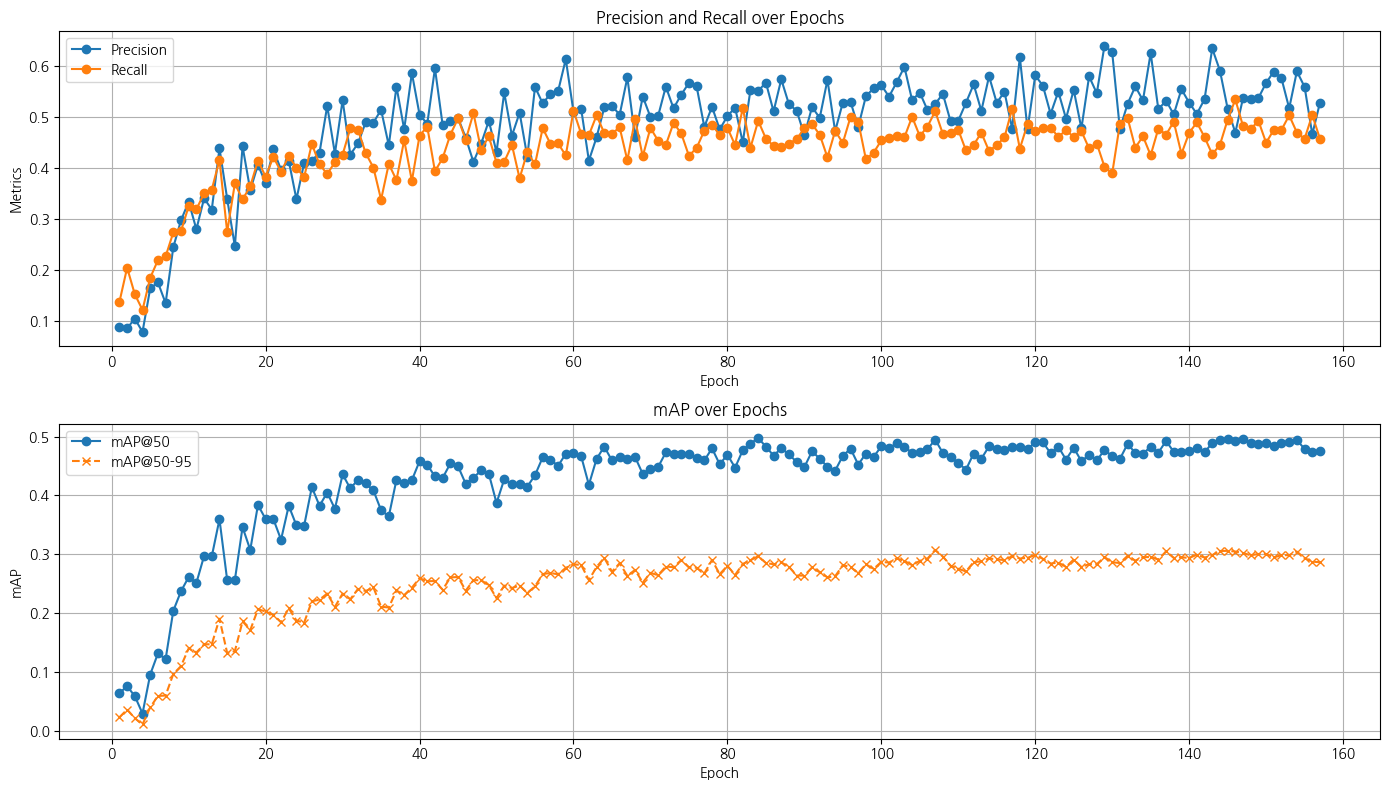

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
results_csv = '/content/runs/detect/yolov8_training3/results.csv'

# CSV 데이터 읽기
results_df = pd.read_csv(results_csv)

# 그래프 그리기
plt.figure(figsize=(14, 8))

# Precision, Recall 그래프
plt.subplot(2, 1, 1)
plt.plot(results_df['epoch'], results_df['metrics/precision(B)'], label='Precision', marker='o')
plt.plot(results_df['epoch'], results_df['metrics/recall(B)'], label='Recall', marker='o')
plt.title('Precision and Recall over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)

# mAP 그래프
plt.subplot(2, 1, 2)
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP@50', marker='o')
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='mAP@50-95', linestyle='--', marker='x')
plt.title('mAP over Epochs')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()


##4. 평가

In [34]:
# 3. 학습된 모델 평가
from ultralytics import YOLO

# 학습된 모델 불러오기
model = YOLO('/content/runs/detect/yolov8_training3/weights/best.pt')

# 검증 데이터 평가
metrics = model.val(data='/content/fishitify/data.yaml')  # Validation 평가

# 반환된 메트릭 확인
print(metrics)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/fishitify/valid/labels.cache... 252 images, 19 backgrounds, 0 corrupt: 100%|██████████| 252/252 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.21it/s]


                   all        252        633      0.525      0.511      0.494      0.306
               bang-eo         30         53      0.604      0.566      0.537      0.345
                 daegu         21         31       0.48      0.419      0.365      0.217
           gamseongdom         57        225       0.71      0.578      0.618      0.376
             gasung-eo         31         64      0.437      0.484      0.535      0.302
            godeung-eo         22         75      0.504      0.771      0.609      0.384
              hwang-eo         28         63      0.599      0.476      0.493       0.27
               nong-eo         26         39      0.534      0.641      0.608      0.442
               sung-eo         31         83      0.331      0.149      0.189      0.114
Speed: 0.3ms preprocess, 4.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array(

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/fishitify/valid/labels.cache... 252 images, 19 backgrounds, 0 corrupt: 100%|██████████| 252/252 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.40it/s]


                   all        252        633      0.525      0.511      0.494      0.306
               bang-eo         30         53      0.604      0.566      0.537      0.345
                 daegu         21         31       0.48      0.419      0.365      0.217
           gamseongdom         57        225       0.71      0.578      0.618      0.376
             gasung-eo         31         64      0.437      0.484      0.535      0.302
            godeung-eo         22         75      0.504      0.771      0.609      0.384
              hwang-eo         28         63      0.599      0.476      0.493       0.27
               nong-eo         26         39      0.534      0.641      0.608      0.442
               sung-eo         31         83      0.331      0.149      0.189      0.114
Speed: 0.3ms preprocess, 4.6ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val3


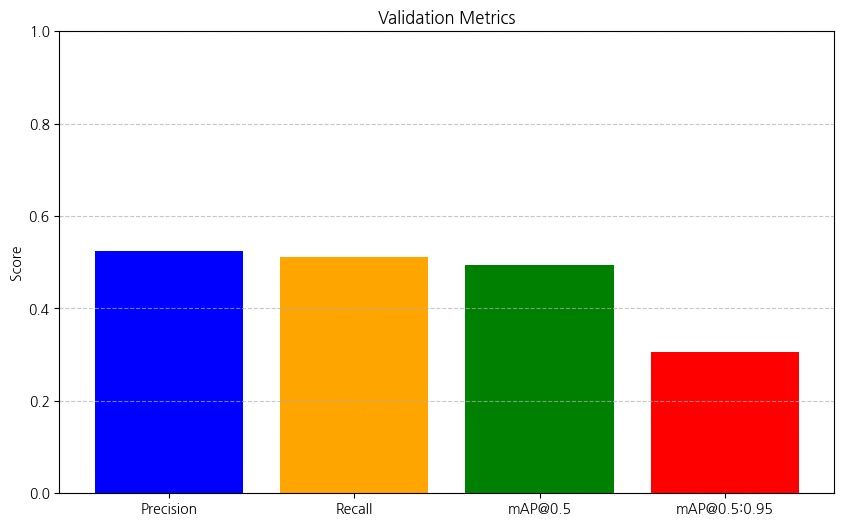

In [37]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# 1. 학습된 모델 불러오기
model = YOLO('/content/runs/detect/yolov8_training3/weights/best.pt')

# 2. 검증 데이터 평가
metrics = model.val(data='/content/fishitify/data.yaml')  # Validation 평가

# 3. 메트릭 값 확인 및 데이터 추출
# 평균 결과 추출 (precision, recall, map50, map50-95)
mean_results = metrics.box.mean_results()

# 메트릭 데이터 저장
metrics_data = {
    "precision": mean_results[0],   # Precision 값
    "recall": mean_results[1],      # Recall 값
    "map_50": mean_results[2],      # mAP@0.5 값
    "map_50_95": mean_results[3]    # mAP@0.5:0.95 값
}

# 4. 그래프 그리기
labels = ["Precision", "Recall", "mAP@0.5", "mAP@0.5:0.95"]
values = [metrics_data["precision"], metrics_data["recall"], metrics_data["map_50"], metrics_data["map_50_95"]]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'orange', 'green', 'red'])

# 그래프 꾸미기
plt.title("Validation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)  # 메트릭 값 범위는 0~1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [50]:
import os
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from ultralytics import YOLO

# 1. 학습된 모델 로드
model = YOLO('/content/runs/detect/yolov8_training3/weights/best.pt')

# 2. 테스트 이미지 경로 설정
image_folder = '/content/fishitify/test/images'
label_folder = '/content/fishitify/test/labels'

# 클래스 이름 리스트 (data.yaml 파일에 있는 순서)
class_names = [
    'bang-eo', 'daegu', 'gamseongdom',
    'gasung-eo', 'godeung-eo', 'hwang-eo',
    'nong-eo', 'sung-eo'
]

# 클래스별 색상 설정 (Ground Truth와 Prediction 색상 분리)
class_colors = {
    'GT': 'green',      # Ground Truth 색상 (초록색)
    'Prediction': 'blue'  # Prediction 색상 (파란색)
}

# 폴더 내의 모든 .jpg 파일 리스트 가져오기
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

# 랜덤으로 9개의 이미지 선택
random_images = random.sample(image_files, min(9, len(image_files)))

# 3. 3x3 그리드로 테스트 이미지 표시
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for ax, img_file in zip(axes.flat, random_images):
    # 이미지 경로
    img_path = os.path.join(image_folder, img_file)
    img = plt.imread(img_path)
    img_h, img_w = img.shape[:2]

    # Ground Truth 라벨 경로
    gt_label_file = os.path.join(label_folder, img_file.replace('.jpg', '.txt'))

    # 4. Ground Truth 바운딩 박스 표시
    if os.path.exists(gt_label_file):
        with open(gt_label_file, 'r') as f:
            for line in f:
                # YOLO 형식 GT 데이터 파싱
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                class_name = class_names[int(class_id)]  # 클래스 이름 가져오기

                # YOLO 형식을 픽셀 좌표로 변환
                x_center *= img_w
                y_center *= img_h
                width *= img_w
                height *= img_h
                x1 = int(x_center - width / 2)
                y1 = int(y_center - height / 2)

                # 바운딩 박스 및 라벨 표시
                ax.add_patch(Rectangle((x1, y1), width, height, edgecolor=class_colors['GT'], facecolor='none', linewidth=2))
                ax.text(x1, y1 - 10, f"GT: {class_name}", color='black', fontsize=10, backgroundcolor='white')

    # 5. Prediction 결과 표시
    results = model.predict(source=img_path, save=False, conf=0.25)
    for pred in results[0].boxes:
        # Prediction 데이터 파싱
        x1, y1, x2, y2 = map(int, pred.xyxy[0])  # 바운딩 박스 좌표
        class_id = int(pred.cls[0])  # 클래스 ID
        confidence = float(pred.conf[0])  # 신뢰도
        class_name = class_names[class_id]  # 클래스 이름

        # 바운딩 박스 및 라벨 표시
        ax.add_patch(Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor=class_colors['Prediction'], facecolor='none', linewidth=2))
        ax.text(x1, y2 + 10, f"Pred: {class_name} ({confidence:.2f})", color='blue', fontsize=10, backgroundcolor='white')

    # 이미지 출력
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
from google.colab import files

# 특정 파일 경로
file_to_download = '/content/runs'

# 파일 다운로드
files.download(file_to_download)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
import shutil
from google.colab import files

# 다운로드하려는 폴더 경로
folder_to_download = '/content/runs'  # 다운로드하려는 폴더 경로
output_zip = '/content/runs.zip'      # 압축 파일 이름

# 1. 폴더를 압축
shutil.make_archive('/content/runs', 'zip', folder_to_download)

# 2. 압축 파일 다운로드
files.download(output_zip)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>